In [7]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

e:\python 3.7.6\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\python 3.7.6\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\python 3.7.6\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\python 3.7.6\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [8]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df["median_house_value"] /= 1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [9]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [13]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [20]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    plt.xlabel(feature)
    plt.ylabel(label)
    
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])
    
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c="r")
    
    plt.show()
    
def plot_the_loss_curve(epoch, rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epoch, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
    
print("Defined!")

Defined!


Epoch 1/70
17000/17000 [==============================] - 2s 98us/sample - loss: 1908391.2818 - root_mean_squared_error: 1381.4451
Epoch 2/70
17000/17000 [==============================] - 1s 86us/sample - loss: 27684.2298 - root_mean_squared_error: 166.3858
Epoch 3/70
17000/17000 [==============================] - 2s 100us/sample - loss: 27046.4589 - root_mean_squared_error: 164.4581
Epoch 4/70
17000/17000 [==============================] - 1s 84us/sample - loss: 26420.2718 - root_mean_squared_error: 162.54310s - loss: 25987.1449 - root_mean_squared_error: 1
Epoch 5/70
17000/17000 [==============================] - 1s 84us/sample - loss: 25696.8220 - root_mean_squared_error: 160.3023
Epoch 6/70
17000/17000 [==============================] - 2s 114us/sample - loss: 24561.3201 - root_mean_squared_error: 156.7205
Epoch 7/70
17000/17000 [==============================] - 3s 148us/sample - loss: 23914.9954 - root_mean_squared_error: 154.6447
Epoch 8/70
17000/17000 [========================

17000/17000 [==============================] - 1s 73us/sample - loss: 13784.1744 - root_mean_squared_error: 117.4060
Epoch 65/70
17000/17000 [==============================] - 1s 85us/sample - loss: 13647.6874 - root_mean_squared_error: 116.8233
Epoch 66/70
17000/17000 [==============================] - 2s 92us/sample - loss: 13720.5315 - root_mean_squared_error: 117.1347
Epoch 67/70
17000/17000 [==============================] - 2s 128us/sample - loss: 13880.7405 - root_mean_squared_error: 117.8166
Epoch 68/70
17000/17000 [==============================] - 2s 104us/sample - loss: 13727.4964 - root_mean_squared_error: 117.1644
Epoch 69/70
17000/17000 [==============================] - 2s 89us/sample - loss: 13775.2375 - root_mean_squared_error: 117.3680
Epoch 70/70
17000/17000 [==============================] - 1s 86us/sample - loss: 13752.2059 - root_mean_squared_error: 117.2698

The learned weight for your model is 0.0072
The learned bias for your model is 185.0878



e:\python 3.7.6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


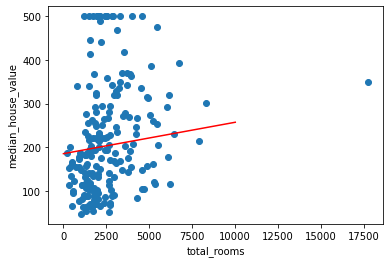

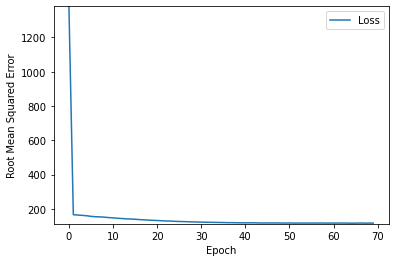

In [25]:
learning_rate=0.01
epochs=70
batch_size=30

my_feature="total_rooms"
my_label="median_house_value"

my_model=None

my_model=build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)